# Introduction to Scikit-Learn (sklearn)



## 0. An end-to-end Scikit_learn Workflow

In [2]:
#1 Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create x (featurse matrix)
X = heart_disease.drop("target", axis=1)

# Creat Y (labels)
y = heart_disease["target"]

In [4]:
# 2. Choose the right model and hypermateters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#We'll keep the default hyperparamters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
#3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
# make a prediction
# y_label = clf.predict(np.array([0, 2 , 3, 4]))
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [8]:
# 4. Evaluate the model on training and test data
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.8524590163934426

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.89      0.86      0.88        37

    accuracy                           0.85        61
   macro avg       0.84      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[20,  4],
       [ 5, 32]])

In [12]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [13]:
# 5. Improve model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 110, 10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators
model accuracy on test set: 73.77%

Trying model with 20 estimators
model accuracy on test set: 81.97%

Trying model with 30 estimators
model accuracy on test set: 83.61%

Trying model with 40 estimators
model accuracy on test set: 81.97%

Trying model with 50 estimators
model accuracy on test set: 80.33%

Trying model with 60 estimators


model accuracy on test set: 80.33%

Trying model with 70 estimators
model accuracy on test set: 85.25%

Trying model with 80 estimators
model accuracy on test set: 83.61%

Trying model with 90 estimators
model accuracy on test set: 81.97%

Trying model with 100 estimators
model accuracy on test set: 81.97%



In [14]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [15]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

## 1. Getting data ready to be used with ML

three main things to do:
1. Split the data into features and labels (Usually 'X' and 'y')
2. Filling (also called imputing) or disregarding missing values
3. Converitn non-numerical values to numeric values (Called feature encoding)

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical


In [21]:
car_sales = pd.read_csv("car-sales-extended.csv")

In [22]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [23]:
# Split the data into X/y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# # Build ML model
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [26]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [27]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [28]:
# lets refit model
# np.random.seed(42)

# X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
# model.fit(X_train, y_train)

In [29]:
# model.score(X_test, y_test)

## What if there is missing values?

1. Fill them with some values()
2. Remove the samples with missing values

In [30]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [31]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [32]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
#" create X and y"

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [34]:
# turn non numeric to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [35]:
# Option 1: Fill missing data with pandas
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")

car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)



In [36]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [37]:
car_sales_missing.dropna(inplace = True)

In [38]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [39]:
#" create X and y"

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# turn non numeric to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

#### option 2: fill missing with sckikit-lean

In [40]:
# Just watch the video, use pandas

In [41]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [42]:
car_sales_filled = car_sales_missing

In [43]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22011714008302485

## Choosing the right estimator

Somte things to note:
* sklrean refers to ml models, algoritms as estimators
* classification problem - predicting category (sticker or not)
    * Sometimes you see clf (short for classifier) used as classification estimator
* regression problem - predicting a number (selling price of a car) 

Refer to sklearn ML model map when in doubt

### 2.1 Picking a ML model

In [44]:
# Get cali housing dataset

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [45]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

housing_df.to_csv("housing.csv")


In [46]:
housing_df["Target"] = housing["target"]

In [47]:
housing_df.head()
housing_df.to_csv("housing.csv")


In [48]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

# Split in to sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the traing set)
model = Ridge()
model.fit(X_train, y_train)

# check score
model.score(X_test, y_test)

0.5758549611440126

In [49]:
# Import algorithm
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

# Split in to sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the traing set)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# check score
model.score(X_test, y_test)

0.8057036267903255

## 2.2 choosing estimator for classification problem.


In [50]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/lsiopy/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/lsiopy/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [52]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

## 3 fit the model/algo and use it to make preds

### 3.1 Fit the model to the data

In [53]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

In [54]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 Make predictions using ML model

2 ways:
1. predict()
2. predict_proba()

In [55]:
# clf.predict(np.array([1,7,8,3,4]))

In [56]:
clf.predict(X_test)


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [57]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [58]:
# compare predict vs test data
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba()


In [60]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [61]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [62]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [64]:
y_preds[:10]

array([0.48974  , 0.76271  , 4.9308764, 2.51934  , 2.35564  , 1.6544501,
       2.32277  , 1.68119  , 2.5135001, 4.8331982])

In [65]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [66]:
# compare preds to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3271080749515505

In [67]:
housing_df["Target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

## 4. evaluation a ML  model

3 inbuilt ways to evaluate

1. Estimator's built in score()
2. The 'scoring' paramter
3. problem specific metric functions


### 4.1 score method

In [68]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)




RandomForestClassifier()

In [70]:
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.8524590163934426, 1.0)

In [71]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("Target", axis = 1)
y = housing_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model =  RandomForestRegressor()

model.fit(X_train, y_train)




RandomForestRegressor()

In [72]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9737315246573421, 0.8057036267903255)

### 4.2 Evaluating a model using scoring paramter

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);




In [74]:
clf.score(X_test, y_test)

0.8524590163934426

In [75]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [76]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

clf_single_score, clf_cross_val_score


(0.8524590163934426, 0.8248087431693989)

In [77]:
cross_val_score(clf, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);
cross_val_score = cross_val_score(clf, X, y)



In [79]:
np.mean(cross_val_score)

0.811639344262295

In [80]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)
y_probs


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [81]:
y_probs_pos = y_probs[:,1]
y_probs_pos[0:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_pos)
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
        0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
        0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
        0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ]),
 array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
        0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
        0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
        0.96875, 1.     , 1.     , 1.     ]),
 array([ inf, 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
        0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
        0.06, 0.05, 0.  ]))

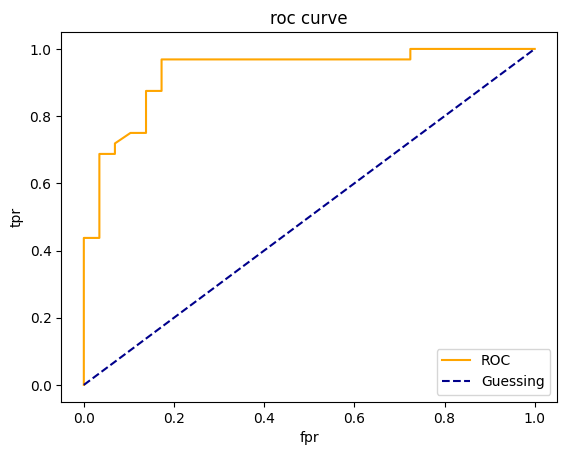

In [83]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("roc curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_pos)

0.9304956896551724

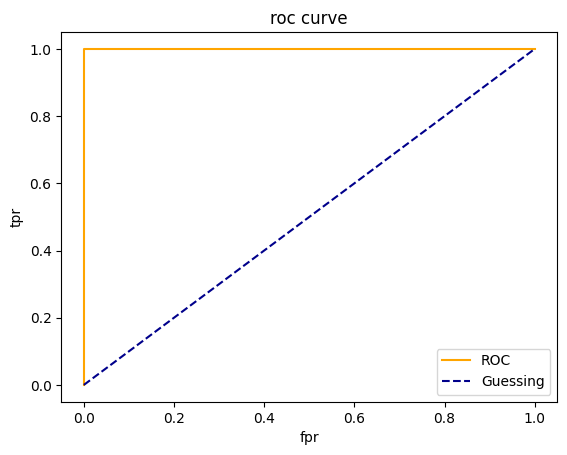

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)


#### Confusion matrix

In [86]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds) 

array([[24,  5],
       [ 4, 28]])

In [87]:
pd.crosstab(y_test, y_preds, rownames=["Actua Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actua Labels,,
0,24,5
1,4,28


<Axes: >

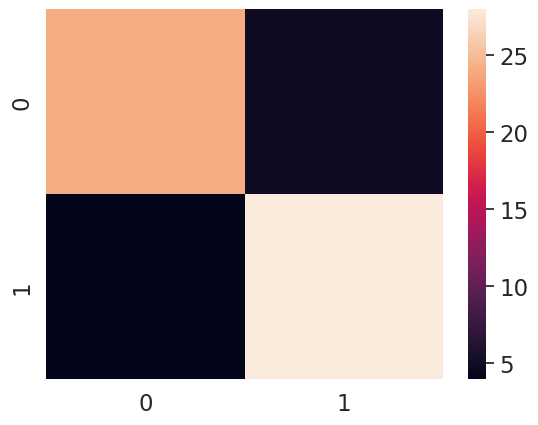

In [88]:
import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

In [89]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [90]:
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


In [91]:
# creating a conf matrix using scikit learn



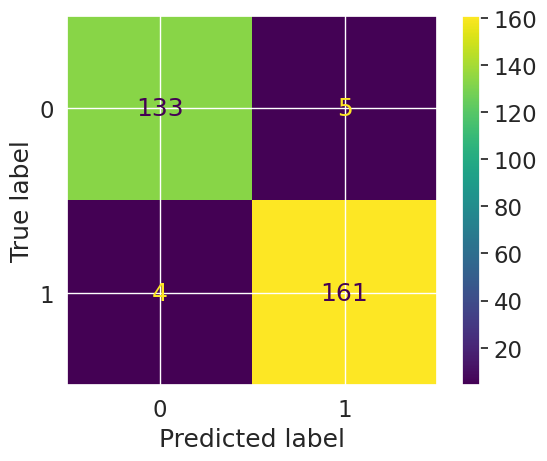

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

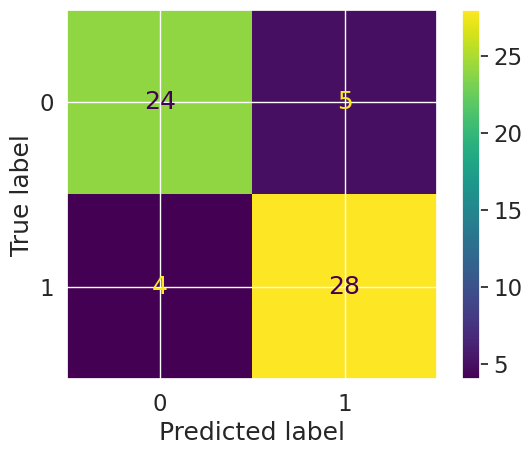

In [93]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

In [94]:
from sklearn.metrics import classification_report


In [95]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### 4.2.2 regression model evaluation

In [96]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [97]:
model.score(X_test, y_test)

0.8057036267903255

In [98]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [99]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [100]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [101]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [102]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

In [103]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae


0.3271080749515505

In [104]:
df = pd.DataFrame(data={"Actual values": y_test, "Predicted values": y_preds})


df["differences"] = df["Predicted values"] - df["Actual values"]

In [105]:
df

,Actual values,Predicted values,differences
20046,0.47700,0.489740,0.012740
3024,0.45800,0.762710,0.304710
15663,5.00001,4.930876,-0.069134
20484,2.18600,2.519340,0.333340
9814,2.78000,2.355640,-0.424360
...,...,...,...
15362,2.63300,2.213760,-0.419240
16623,2.66800,1.960910,-0.707090
18086,5.00001,4.850269,-0.149741
2144,0.72300,0.714750,-0.008250


In [106]:
# MAE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.25460771189360204

### 4.2.3 finally using the scoring parameter

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [108]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=10, scoring=None)
cv_acc

array([0.80645161, 0.80645161, 0.87096774, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.76666667])

In [109]:
np.random.seed(42)

cv_prec = cross_val_score(clf, X, y, cv=20, scoring="precision")
# cv_prec
cv_prec_mean = np.mean(cv_prec)*100
cv_prec_mean

83.34000721500722

In [110]:
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv=20, scoring="recall")
# cv_prec
cv_recall_mean = np.mean(cv_recall)*100
cv_recall_mean

87.84722222222221

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

model = RandomForestRegressor()



In [112]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=2)
np.mean(cv_r2)


0.6129671578362851

In [113]:
np.random.seed(42)

cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4836356089389536

In [114]:
np.random.seed(42)

cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4621890043219781

In [115]:
cv_mse, cv_mae

(array([-0.51313662, -0.33434648, -0.53908391]),
 array([-0.51944289, -0.42677428, -0.50468966]))

### 4.3 Using scikit metrics


In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

acc = accuracy_score()


TypeError: missing a required argument: 'y_true'